In [1]:
#Importing the basic libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import joblib

In [3]:
#Importing the dataset
data = pd.read_csv('OnlineRetail.csv')
df = pd.DataFrame(data)

Basic data exploration

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
#Removing the duplicates and null values
df = df.drop_duplicates()
df = df.dropna()

In [9]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
#Grouping the numerical columns into one 
numerical_columns = df.select_dtypes(include=[ 'number'])
numerical_columns.head()

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0


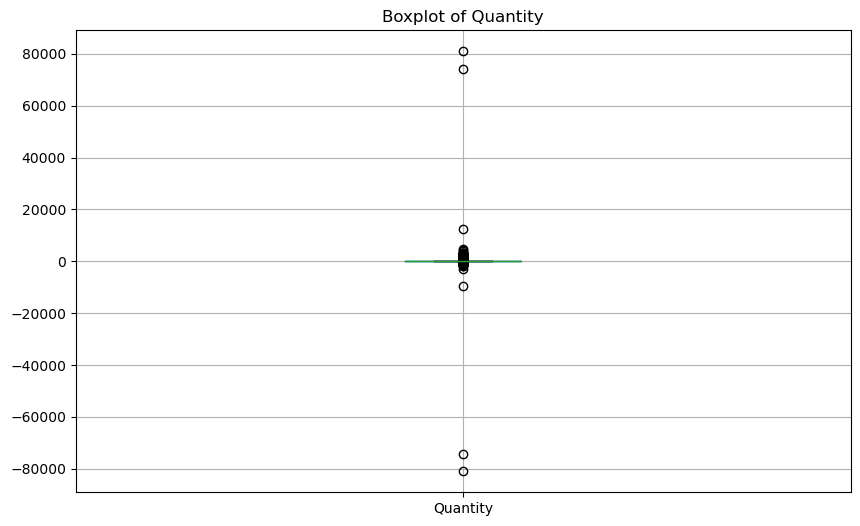

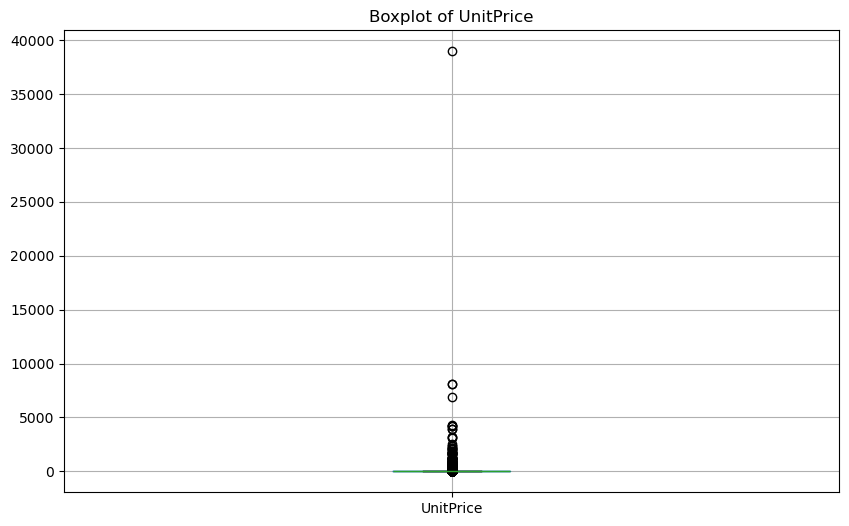

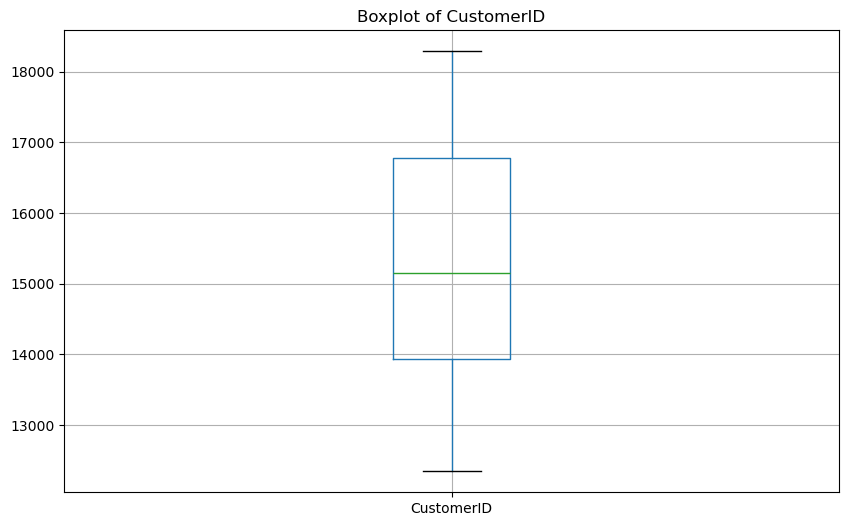

In [12]:
#Using boxplot to see the outliers 
for column in numerical_columns.columns:
    plt.figure(figsize=(10,6))
    numerical_columns.boxplot(column= column)
    plt.title(f'Boxplot of {column}')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a9020e0d10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9020e1190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9020e0a40>,
 'medians': [<matplotlib.lines.Line2D at 0x1a9020e1730>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a9020e1a00>,
 'means': []}

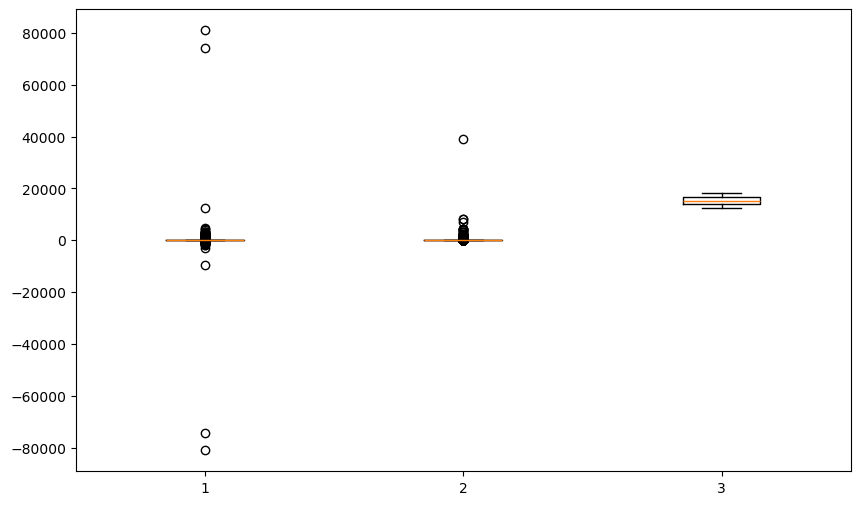

In [13]:
plt.figure(figsize=(10,6))
plt.boxplot(numerical_columns)

In [14]:
# Creating a function to handle outliers

def Handling_outliers(df):
    for col in df.select_dtypes(include = ['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1 
        Lower_bound = Q1 - (1.5 * IQR)
        Upper_bound = Q1 + (1.5 * IQR)

        #Capping the outliers
        df[col]= df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)
    return df
    

In [15]:
df1 = Handling_outliers(df)
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


<Axes: >

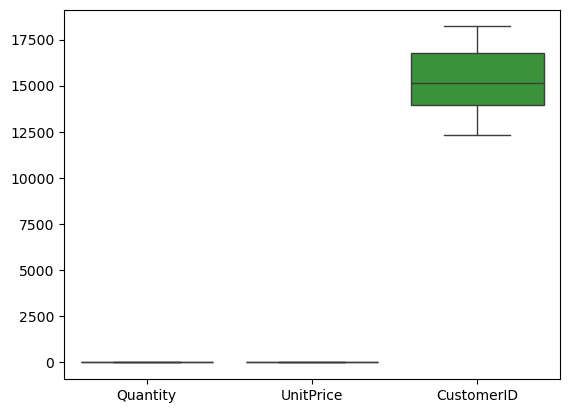

In [16]:
sns.boxplot(df1)

In [17]:
# Removing the unnecesary date column

df1 = df1.drop(columns=['InvoiceDate'])
df1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,17850.0,United Kingdom


In [18]:
#Finding Skewness
Numerical_features = df1.select_dtypes(include=['float64','int']).columns
print(df1[Numerical_features].skew())

Quantity      0.373814
UnitPrice     0.565607
CustomerID    0.032836
dtype: float64


# Plotting

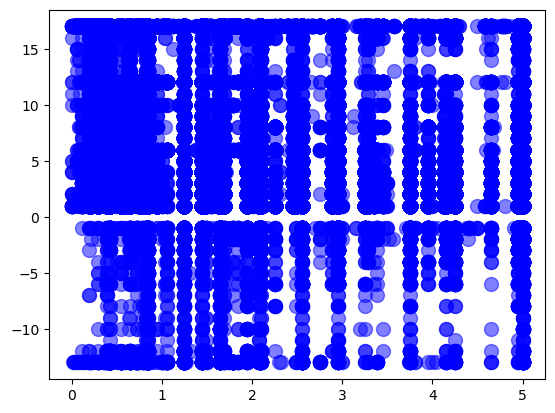

In [19]:
plt.scatter(df['UnitPrice'],df['Quantity'],color = 'blue',s = 100, alpha = 0.5)


In [20]:
# Calculating the total price 
df1['TotalPrice'] = df1.Quantity * df1.UnitPrice
df1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,17850.0,United Kingdom,20.34


In [21]:
# model preparation
df1['Description'] = df1['Description'].fillna('')

In [22]:
print(df1['Description'].head())

0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
Name: Description, dtype: object


In [28]:
# implementing count vectorizer
count_vectorizer = CountVectorizer(stop_words='english', max_features=1000)

In [29]:
count_matrix = count_vectorizer.fit_transform(df1['Description'].fillna(''))

In [30]:
print(f"Count Matrix Shape: {count_matrix.shape}")

Count Matrix Shape: (401604, 1000)


In [33]:
#Nearest Neigbour model
nn_model = NearestNeighbors(metric='cosine', algorithm='brute')

# Fit the model
nn_model.fit(count_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [34]:
def recommend_products_nn(product_index, nn_model, data, top_n=5):
    """
    Recommends top-N similar products using Nearest Neighbors.

    :param product_index: Index of the product for which recommendations are needed.
    :param nn_model: Fitted Nearest Neighbors model.
    :param data: Original dataset.
    :param top_n: Number of recommendations to return.
    :return: List of recommended product descriptions.
    """
    # Find the nearest neighbors
    distances, indices = nn_model.kneighbors(count_matrix[product_index], n_neighbors=top_n + 1)
    
    # Get the indices of the recommended products (excluding the first match, which is itself)
    recommended_indices = indices.flatten()[1:]
    
    # Return descriptions of recommended products
    return data['Description'].iloc[recommended_indices]

# Example: Recommend products similar to the first product
product_index = 0
recommended = recommend_products_nn(product_index, nn_model, df1, top_n=5)

print("Recommended Products:")
print(recommended)


Recommended Products:
275371    WHITE HANGING HEART T-LIGHT HOLDER
369110    WHITE HANGING HEART T-LIGHT HOLDER
275466    WHITE HANGING HEART T-LIGHT HOLDER
182989    WHITE HANGING HEART T-LIGHT HOLDER
275485    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object


In [36]:
#saving the model
# Save the Nearest Neighbors model
joblib.dump(nn_model, 'nearest_neighbors_model.pkl')

# Save the Count Vectorizer for consistent transformations
joblib.dump(count_vectorizer, 'count_vectorizer.pkl')

print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.


In [37]:
#loading the saved model
# Load the Nearest Neighbors model
nn_model = joblib.load('nearest_neighbors_model.pkl')

# Load the Count Vectorizer
count_vectorizer = joblib.load('count_vectorizer.pkl')

print("Model and vectorizer loaded successfully.")


Model and vectorizer loaded successfully.


In [38]:
#making predictions

# Transform product descriptions using the loaded vectorizer
new_count_matrix = count_vectorizer.transform(df1['Description'].fillna(''))

# Recommend products for a specific index
product_index = 0
recommended = recommend_products_nn(product_index, nn_model, df1, top_n=5)

print("Recommended Products:")
print(recommended)


Recommended Products:
275371    WHITE HANGING HEART T-LIGHT HOLDER
369110    WHITE HANGING HEART T-LIGHT HOLDER
275466    WHITE HANGING HEART T-LIGHT HOLDER
182989    WHITE HANGING HEART T-LIGHT HOLDER
275485    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object
